In [4]:
from openai import OpenAI
import pandas as pd
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
api_key = input("Please enter the OpenAI API Key:")
# api_key = ""

client = OpenAI(api_key = api_key)

In [9]:
# Run fine-tuned model
cwd = os.getcwd()+ '/data/'

prompt = '''
Given the following APIs: 
"""
velocity_publisher(linear, angular): returns nothing. Publishes one linear and angular velocity command to the robot. 
stop(): returns nothing. Stops the robot. 
math.pi: returns the value of pi (float).
time.time(): returns the elapsed seconds since the epoch.
pedestrian_observed(): returns a boolean value indicating whether a pedestrian is observed.
"""
Write a Python function called "turn_right_60_degrees" that controls a car through a complete 60-degree right turn. Please response the python function only.
'''

job_id = "ENTER JOB ID HERE"
job = client.fine_tuning.jobs.retrieve(job_id)

ft_model = job.fine_tuned_model
completion = client.chat.completions.create(
  model=ft_model,
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt}
  ]
)
print(completion.choices[0].message.content)

def turn_right_60_degrees():
    duration = 2  # Turning time/duration (seconds)
    radius = 1  # Radius (meters)
    radian = -math.pi/3  # 60 deg clockwise = -pi/3
    angular = radian / duration  # Angular velocity (rad/sec)
    linear = radius * abs(angular)  # Linear velocity (m/s)
    stopping_time = 0  # Total time stopped for pedestrians
    start_time = time.time()

    while (time.time() - start_time) - stopping_time < duration:
        time_at = time.time()
        if pedestrian_observed():
            stop()
            stopping_time += time.time() - time_at
        else:
            velocity_publisher(linear, angular)



In [10]:
# Retrive and save fine-tuning results
content = client.files.content(job.result_files[0])

with open(cwd + 'losses.csv', 'wb') as f:
    f.write(base64.b64decode(content.text.encode('utf-8')))

In [11]:
df = pd.read_csv(cwd+'losses.csv')
df.head()

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
0,1,1.70804,0.72483,NaN,NaN
1,2,0.31734,0.95312,NaN,NaN
2,3,1.69804,0.71523,NaN,NaN
3,4,1.11891,0.80108,NaN,NaN
4,5,1.53980,0.72549,NaN,NaN


<Axes: xlabel='step', ylabel='train_loss'>

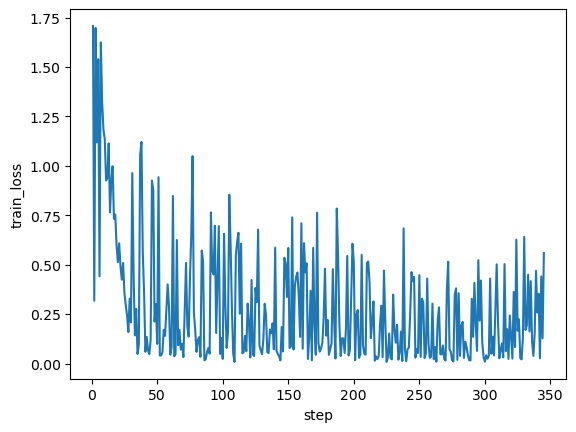

In [14]:
sns.lineplot(df, x='step', y='train_loss')